In [1]:
! pip install gdown


[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: pip install --upgrade pip


In [2]:
! pip install torch accelerate imblearn transformers nltk pandas numpy matplotlib seaborn wordcloud tk


[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: pip install --upgrade pip


In [3]:
# download from Google Drive
! gdown "https://drive.google.com/uc?id=178f_VkNxccNidap-5-uffXUW475pAuPy&confirm=t"

Downloading...
From: https://drive.google.com/uc?id=178f_VkNxccNidap-5-uffXUW475pAuPy&confirm=t
To: /Users/bushraabdullahi/Library/CloudStorage/OneDrive-Personal/Uni/L6/Final Project/FP-final/fake-news.zip
100%|██████████████████████████████████████| 48.7M/48.7M [00:07<00:00, 6.76MB/s]


In [4]:
import os

submit = 'submit.csv'
test = 'test.csv'
train = 'train.csv'

if os.path.exists(submit):
    os.remove(submit)
    print(f"{submit} has been deleted.")
else:
    print(f"{submit} does not exist.")

if os.path.exists(test):
    os.remove(test)
    print(f"{test} has been deleted.")
else:
    print(f"{test} does not exist.")

if os.path.exists(train):
    os.remove(train)
    print(f"{train} has been deleted.")
else:
    print(f"{train} does not exist.")

    
! unzip fake-news.zip


submit.csv has been deleted.
test.csv has been deleted.
train.csv has been deleted.


Archive:  fake-news.zip
  inflating: submit.csv              
  inflating: test.csv                
  inflating: train.csv               


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download("punkt")

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/bushraabdullahi/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/bushraabdullahi/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/bushraabdullahi/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [6]:
df = pd.read_csv("train.csv")
df.isnull().sum()

id           0
title      558
author    1957
text        39
label        0
dtype: int64

In [7]:
df = df.dropna()
df.isnull().sum()

id        0
title     0
author    0
text      0
label     0
dtype: int64

In [8]:
df["label"].value_counts()
# 1 = unreliable
# 0 = reliable

label
0    10361
1     7924
Name: count, dtype: int64

In [9]:
from imblearn.under_sampling import RandomUnderSampler

# Separate features and labels
X = df.drop("label", axis=1)
y = df["label"]

# Apply random undersampling
rus = RandomUnderSampler()
X_balanced, y_balanced = rus.fit_resample(X, y)

y_balanced.value_counts()



label
0    7924
1    7924
Name: count, dtype: int64

In [10]:
import pandas as pd

# Reconstruct balanced DataFrame with original column names
X_balanced_df = pd.DataFrame(X_balanced, columns=X.columns)

# Combine balanced features with balanced labels
balanced_df = pd.concat([X_balanced_df, y_balanced], axis=1)

In [11]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# Define a function to remove stop words and lemmatize text
def preprocess_text(text):
    # Tokenize the text
    tokens = word_tokenize(text)

    # Remove stop words
    stop_words = set(stopwords.words("english"))
    tokens = [token for token in tokens if token.lower() not in stop_words]

    # Lemmatize the tokens
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(token) for token in tokens]

    # Join the tokens back into a single string
    preprocessed_text = " ".join(tokens)
    
    return preprocessed_text

# Create a new DataFrame with the same structure as the original one
preprocessed_df = balanced_df.copy()

# Preprocess the "text" column
preprocessed_df["text"] = preprocessed_df["text"].apply(preprocess_text)

# Preprocess the "title" column
preprocessed_df["title"] = preprocessed_df["title"].apply(preprocess_text)


In [12]:
preprocessed_df.head()

,id,title,author,text,label
2319,2319,"Rafael Nadal , March Life : Friday Evening Bri...",Karen Zraick and Sandra Stevenson,( Want get briefing email ? ’ . ) Good evening...,0
10163,10163,Kristen Stewart : Must ‘ Shatter ’ Idea Playin...,AWR Hawkins,June 7 Brady Center Bear Awards — celebrity ap...,0
2230,2230,Singer Chris Brown Arrested Standoff Los Angel...,Joe Coscarelli,RB singer Chris Brown arrested Los Angeles pol...,0
19134,19134,Warriors Edge Thunder Extend Dream Season N.B....,Scott Cacciola,"OAKLAND , Calif. — Golden State Warriors enter...",0
19523,19523,"Jeremy Corbyn , Leader Britain ’ Labour Party ...",Stephen Castle,"LONDON — Britain ’ opposition Labour Party , a...",0


In [19]:
file_path = "preprocessed_data.csv"

import os

# Check if the file exists before attempting to delete it
if os.path.exists(file_path):
    # Delete the file
    os.remove(file_path)
    print(f"{file_path} has been deleted.")
else:
    print(f"{file_path} does not exist.")




preprocessed_data.csv has been deleted.


In [20]:
preprocessed_df.to_csv(file_path, index=False)

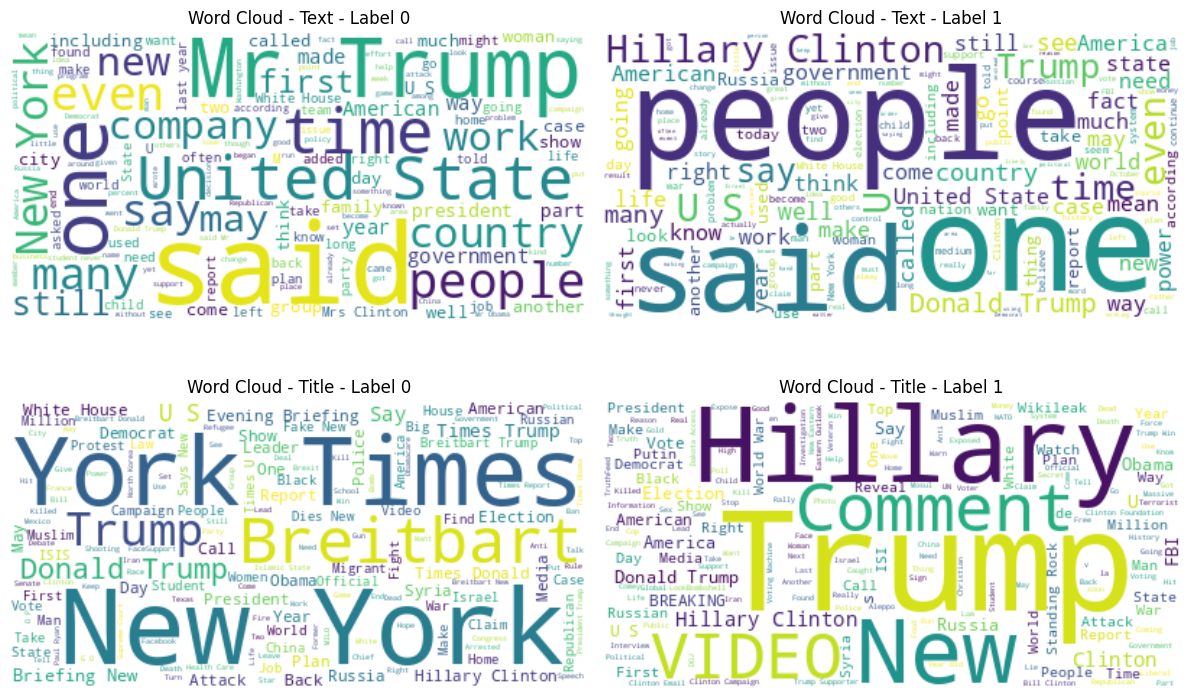

In [14]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Function to generate a word cloud for a given column
def generate_word_cloud(column_name, label, subplot_position):
    text_string = " ".join(preprocessed_df[preprocessed_df["label"] == label][column_name])
    wordcloud = WordCloud(width=400, height=200, background_color="white").generate(text_string)
    ax[subplot_position[0], subplot_position[1]].imshow(wordcloud, interpolation="bilinear")
    ax[subplot_position[0], subplot_position[1]].axis("off")
    ax[subplot_position[0], subplot_position[1]].set_title(f"Word Cloud - {column_name.capitalize()} - Label {label}")

# Create subplots
fig, ax = plt.subplots(2, 2, figsize=(12, 8))

# Generate word clouds for the "text" column
generate_word_cloud("text", 0, (0, 0))
generate_word_cloud("text", 1, (0, 1))

# Generate word clouds for the "title" column
generate_word_cloud("title", 0, (1, 0))
generate_word_cloud("title", 1, (1, 1))

# Adjust spacing between subplots
plt.tight_layout()

plt.show()
